In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import joblib
import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [72]:
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

In [73]:
true_df['label'] = 1
fake_df['label'] = 0

In [74]:
df = pd.concat([true_df, fake_df], ignore_index=True)

In [75]:
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [76]:
df.tail()

,title,text,subject,date,label
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44897,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [77]:
df.shape

(44898, 5)

In [78]:
df.columns.tolist()

['title', 'text', 'subject', 'date', 'label']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [80]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [81]:
print("\n🔹 Label Distribution:")
print(df['label'].value_counts())


🔹 Label Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


🔹 Label Distribution:
label
0    23481
1    21417
Name: count, dtype: int64


/tmp/ipython-input-3856550803.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


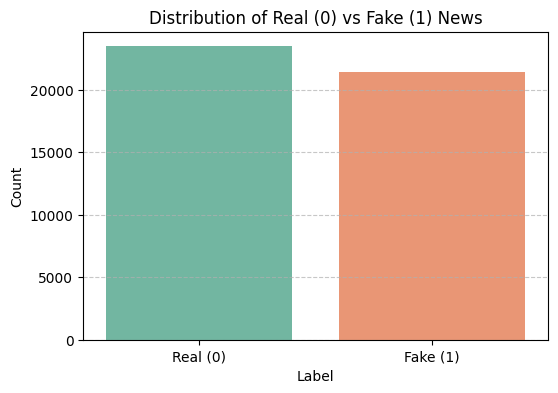

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print("🔹 Label Distribution:")
print(df['label'].value_counts())

# Plotting class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Real (0) vs Fake (1) News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [83]:
# Percentage distribution
label_counts = df['label'].value_counts(normalize=True) * 100
print("\n🔹 Percentage Distribution:\n", label_counts)



🔹 Percentage Distribution:
 label
0    52.298543
1    47.701457
Name: proportion, dtype: float64


In [84]:
from imblearn.over_sampling import RandomOverSampler

# Vectorizing text before balancing
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])
y = df['label']

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check new label distribution
from collections import Counter
print("\n🔹 After Oversampling:", Counter(y_resampled))



🔹 After Oversampling: Counter({1: 23481, 0: 23481})


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [86]:
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X = tfidf.fit_transform(df['text'])  # df['text'] contains the news articles
y = df['label']                      # df['label'] contains 0 (real) and 1 (fake)


In [87]:
# Split before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [89]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))


Before SMOTE: Counter({0: 18831, 1: 17087})
After SMOTE: Counter({0: 18831, 1: 18831})


In [90]:
df = df[['title', 'text', 'label']]

In [91]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing or empty text
df.dropna(subset=['text'], inplace=True)
df = df[df['text'].str.strip().astype(bool)]  # Remove rows with empty strings

In [92]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define preprocessing function
def preprocess_text(text):
    if isinstance(text, float):
        text = str(text)
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-words
    text = re.sub(r'\d+', '', text)  # Remove digits
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [93]:
print(df[['text', 'clean_text', 'label']].head())


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                          clean_text  label  
0  washington reuter head conserv republican fact...      1  
1  washington reuter transgend peopl allow first ...      1  
2  washington reuter special counsel investig lin...      1  
3  washington reuter trump campaign advis georg p...      1  
4  seattl washington reuter presid donald trump c...      1  


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=5, stop_words='english')


In [95]:
# Fit and transform the cleaned text
X = tfidf_vectorizer.fit_transform(df['clean_text'])

# Target variable
y = df['label']


In [96]:
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (38658, 22773)


In [97]:
import pandas as pd

# Basic inspection
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38658 entries, 0 to 44119
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       38658 non-null  object
 1   text        38658 non-null  object
 2   label       38658 non-null  int64 
 3   clean_text  38658 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [98]:
df.describe()

,label
count,38658.000000
mean,0.548295
std,0.497669
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [99]:
df['label'].value_counts()

,count
label,
1,21196
0,17462


In [100]:
df.isnull().sum()


,0
title,0
text,0
label,0
clean_text,0


In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import numpy as np


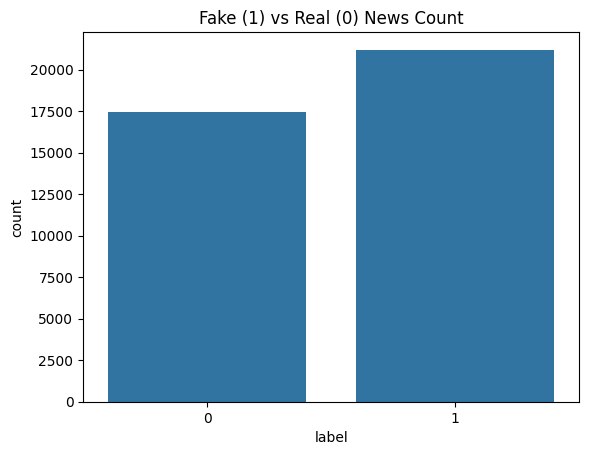

In [103]:
sns.countplot(x='label', data=df)
plt.title('Fake (1) vs Real (0) News Count')
plt.show()


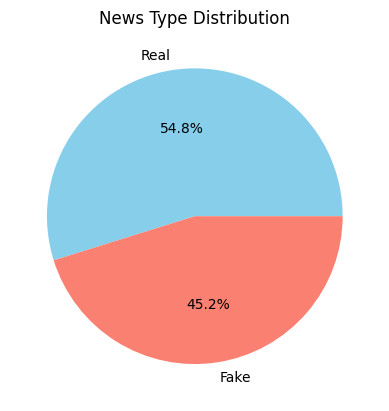

In [104]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Real', 'Fake'], colors=['skyblue', 'salmon'])
plt.title("News Type Distribution")
plt.ylabel('')
plt.show()


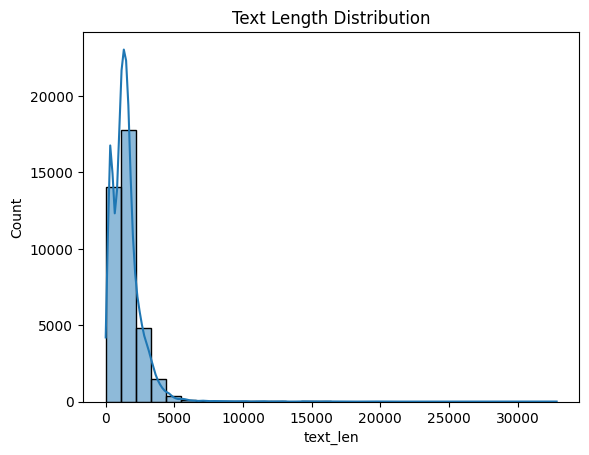

In [105]:
df['text_len'] = df['clean_text'].apply(len)
sns.histplot(df['text_len'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()


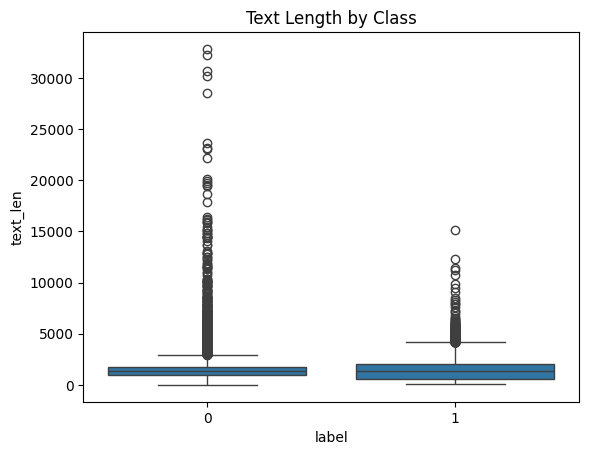

In [106]:
sns.boxplot(x='label', y='text_len', data=df)
plt.title("Text Length by Class")
plt.show()


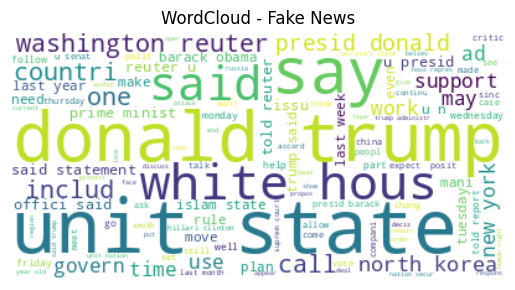

In [107]:
text_fake = ' '.join(df[df['label'] == 1]['clean_text'])
wc = WordCloud(background_color='white').generate(text_fake)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake News")
plt.show()


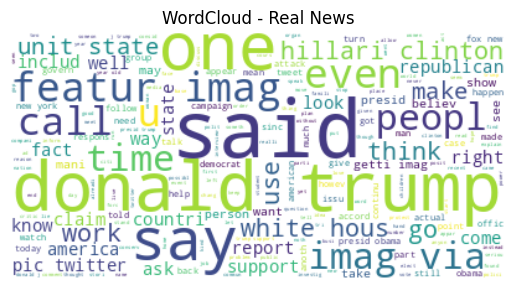

In [108]:
text_real = ' '.join(df[df['label'] == 0]['clean_text'])
wc = WordCloud(background_color='white').generate(text_real)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Real News")
plt.show()


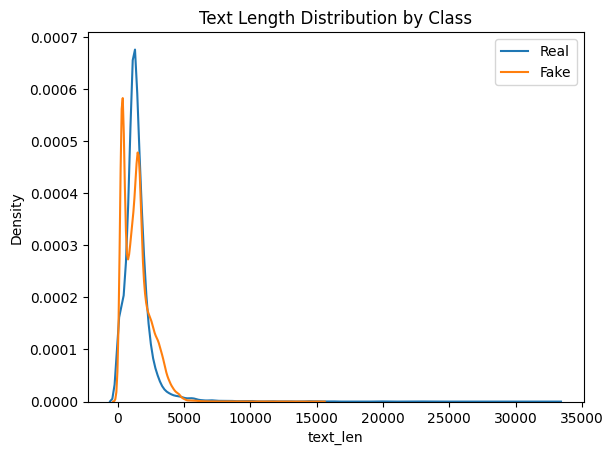

In [109]:
sns.kdeplot(df[df['label']==0]['text_len'], label='Real')
sns.kdeplot(df[df['label']==1]['text_len'], label='Fake')
plt.legend()
plt.title("Text Length Distribution by Class")
plt.show()


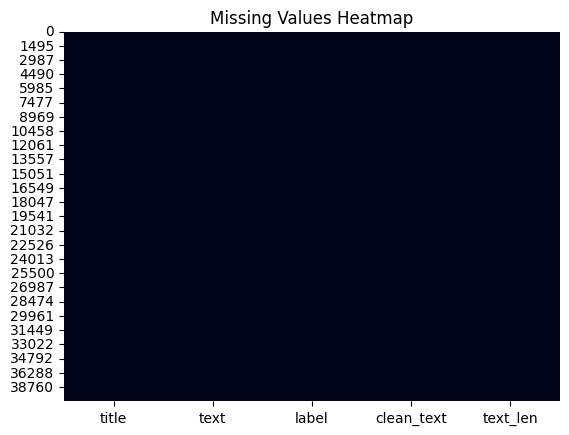

In [110]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


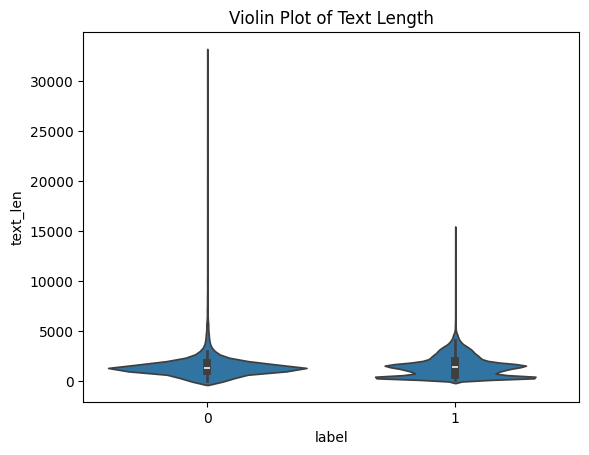

In [111]:
sns.violinplot(x='label', y='text_len', data=df)
plt.title("Violin Plot of Text Length")
plt.show()


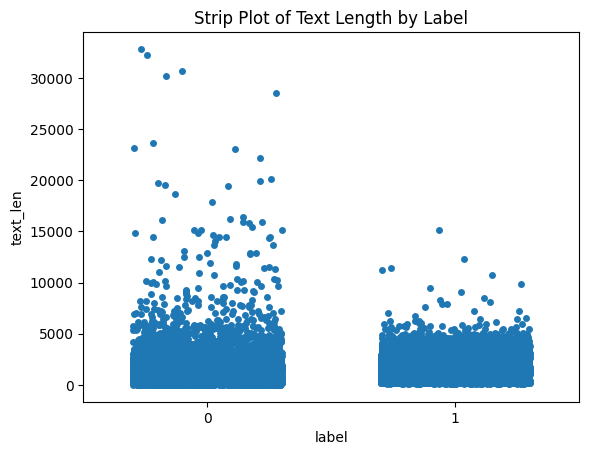

In [112]:
sns.stripplot(x='label', y='text_len', data=df, jitter=0.3)
plt.title("Strip Plot of Text Length by Label")
plt.show()


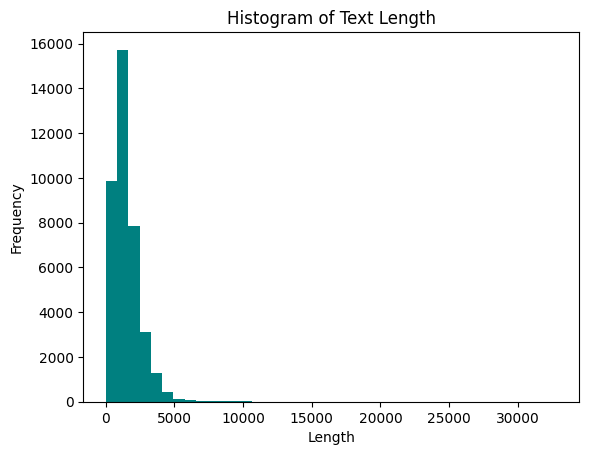

In [113]:
plt.hist(df['text_len'], bins=40, color='teal')
plt.title("Histogram of Text Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


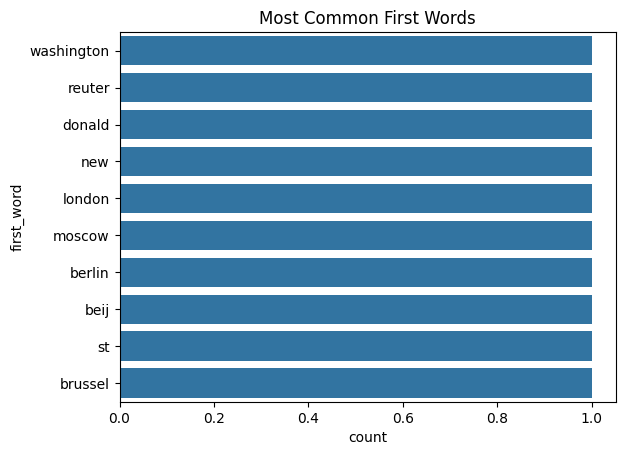

In [114]:
df['first_word'] = df['clean_text'].apply(lambda x: x.split()[0] if len(x.split()) > 0 else "")
sns.countplot(y=df['first_word'].value_counts().head(10).index)
plt.title("Most Common First Words")
plt.show()


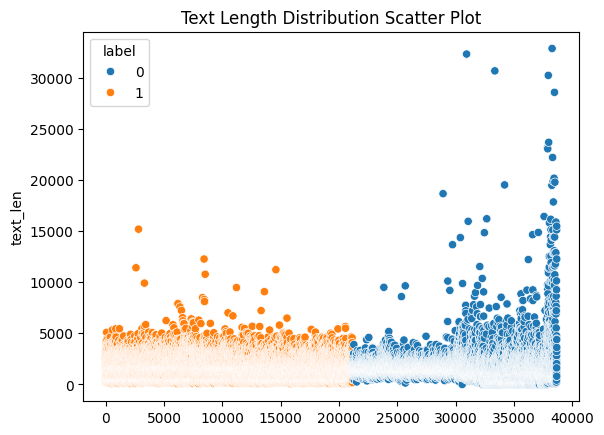

In [115]:
sns.scatterplot(x=np.arange(len(df)), y='text_len', hue='label', data=df)
plt.title("Text Length Distribution Scatter Plot")
plt.show()


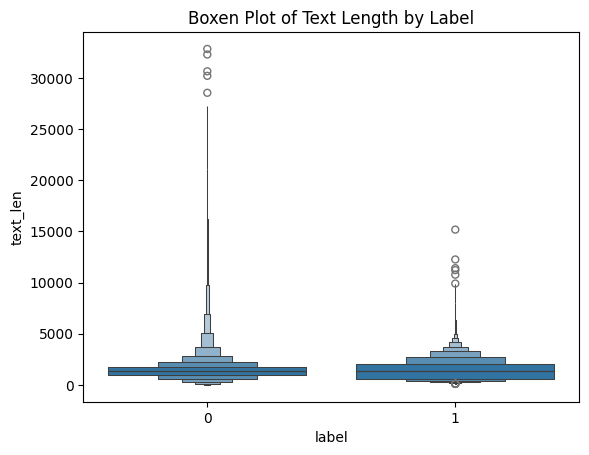

In [116]:
sns.boxenplot(x='label', y='text_len', data=df)
plt.title("Boxen Plot of Text Length by Label")
plt.show()


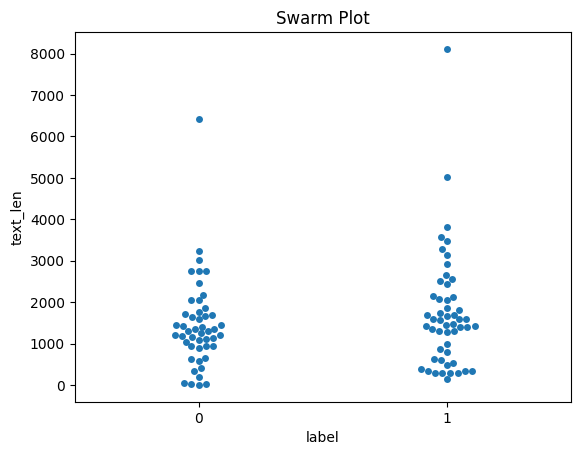

In [117]:
sns.swarmplot(x='label', y='text_len', data=df.sample(100))  # sample to avoid clutter
plt.title("Swarm Plot")
plt.show()


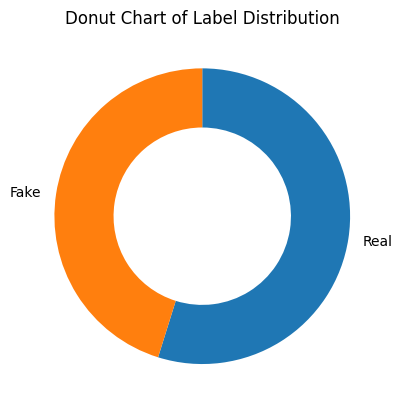

In [118]:
sizes = df['label'].value_counts()
labels = ['Real', 'Fake']
plt.pie(sizes, labels=labels, startangle=90, counterclock=False, wedgeprops=dict(width=0.4))
plt.title("Donut Chart of Label Distribution")
plt.show()


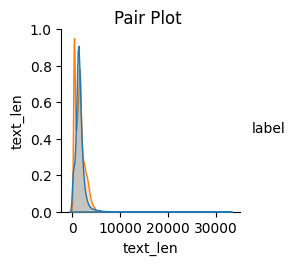

In [119]:
# Example if you have numeric features like text_len
sns.pairplot(df[['text_len', 'label']], hue='label')
plt.suptitle("Pair Plot", y=1.02)
plt.show()


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


In [121]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [123]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [124]:
y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.926021727884118
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      4366
           1       0.94      0.93      0.93      5299

    accuracy                           0.93      9665
   macro avg       0.93      0.93      0.93      9665
weighted avg       0.93      0.93      0.93      9665

Confusion Matrix:
 [[4031  335]
 [ 380 4919]]


In [125]:
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [127]:
import re
import string
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
joblib.dump(trained_models['Logistic Regression'], 'model_lr.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [133]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [136]:
with open('model_nb.pkl', 'wb') as f:
    pickle.dump(model, f)


In [137]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [143]:
import re
import string
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
sample_text = "Breaking: Govt announces new budget at https://budgetnews.com!"
cleaned = clean_text(sample_text)
print(cleaned)


breaking govt announces new budget


In [149]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load datasets
true_df = pd.read_csv("True.csv")
fake_df = pd.read_csv("Fake.csv")

# Add labels
true_df['label'] = 0  # Real news
fake_df['label'] = 1  # Fake news

# Combine datasets
df = pd.concat([true_df, fake_df], ignore_index=True)

# Combine title and text fields
df['text'] = df['title'] + " " + df['text']

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation
    text = text.strip()
    words = text.split()
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning to text column
df['cleaned_text'] = df['text'].apply(clean_text)

# ✅ Now `df['cleaned_text']` is ready to be used


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF with limited features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']


In [151]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Save the model and vectorizer
import joblib
joblib.dump(nb_model, 'model_nb.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [163]:
!ngrok config add-authtoken "30dnccOrwJ9hob64KP60KQ9mQFf_5hE67WwFWhJ9bSYeVqgVH"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [172]:
from google.colab import files

files.download("model_nb.pkl")
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
from google.colab import files
files.upload()  # Upload both model_nb.pkl and tfidf_vectorizer.pkl

Saving tfidf_vectorizer.pkl to tfidf_vectorizer (1).pkl
Saving model_nb.pkl to model_nb (1).pkl


{'tfidf_vectorizer (1).pkl': b'\x80\x04\x95\xb4\x02\x00\x00\x00\x00\x00\x00\x8c\x1fsklearn.feature_extraction.text\x94\x8c\x0fTfidfVectorizer\x94\x93\x94)\x81\x94}\x94(\x8c\x05input\x94\x8c\x07content\x94\x8c\x08encoding\x94\x8c\x05utf-8\x94\x8c\x0cdecode_error\x94\x8c\x06strict\x94\x8c\rstrip_accents\x94N\x8c\x0cpreprocessor\x94N\x8c\ttokenizer\x94N\x8c\x08analyzer\x94\x8c\x04word\x94\x8c\tlowercase\x94\x88\x8c\rtoken_pattern\x94\x8c\r(?u)\\b\\w\\w+\\b\x94\x8c\nstop_words\x94N\x8c\x06max_df\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\x06min_df\x94K\x01\x8c\x0cmax_features\x94M\x88\x13\x8c\x0bngram_range\x94K\x01K\x01\x86\x94\x8c\nvocabulary\x94N\x8c\x06binary\x94\x89\x8c\x05dtype\x94\x8c\x05numpy\x94\x8c\x07float64\x94\x93\x94\x8c\x04norm\x94\x8c\x02l2\x94\x8c\x07use_idf\x94\x88\x8c\nsmooth_idf\x94\x88\x8c\x0csublinear_tf\x94\x89\x8c\x06_tfidf\x94h\x00\x8c\x10TfidfTransformer\x94\x93\x94)\x81\x94}\x94(h\x1fh h!\x88h"\x88h#\x89\x8c\x0en_features_in_\x94M\x88\x13\x8c\x04idf_\x94\x8c\x13joblib

In [177]:
!ngrok.connect(port=8501)


/bin/bash: -c: line 1: syntax error near unexpected token `port=8501'
/bin/bash: -c: line 1: `ngrok.connect(port=8501)'


In [178]:
!pip install streamlit pyngrok --quiet


In [186]:
from google.colab import files
uploaded = files.upload()

Saving tfidf_vectorizer.pkl to tfidf_vectorizer (2).pkl
Saving model_nb.pkl to model_nb (2).pkl


In [187]:
print(df['label'].value_counts())


label
1    23481
0    21417
Name: count, dtype: int64


In [188]:
import re
import string
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)


In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example with MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [191]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4042  288]
 [ 291 4359]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4330
           1       0.94      0.94      0.94      4650

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



In [228]:
!pip install streamlit pyngrok

In [229]:
%%writefile app.py
import streamlit as st
import joblib

# Load model and vectorizer
model = joblib.load("model_nb.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

def predict_news(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return "Fake News" if prediction[0] == 0 else "Real News"

# Streamlit UI
st.title("📰 Fake News Detector")
user_input = st.text_area("Enter News Article Text Here:")

if st.button("Detect"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        result = predict_news(user_input)
        st.success(f"🧠 Prediction: {result}")


Overwriting app.py


In [231]:
!ngrok config add-authtoken 30dnccOrwJ9hob64KP60KQ9mQFf_5hE67WwFWhJ9bSYeVqgVH


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [232]:
from pyngrok import ngrok
import os

# Kill any previous tunnel
ngrok.kill()

# Start new tunnel
public_url = ngrok.connect(8501)
print("🚀 Streamlit URL:", public_url)

# Launch Streamlit app in background
!streamlit run app.py &> /dev/null &


🚀 Streamlit URL: NgrokTunnel: "https://991d230c66fb.ngrok-free.app" -> "http://localhost:8501"


In [234]:
from pyngrok import ngrok
ngrok.kill()  # This stops all old tunnels


In [235]:
from pyngrok import ngrok
import os

# Reconnect ngrok tunnel to port 8501
public_url = ngrok.connect(8501)
print("🚀 Streamlit URL:", public_url)

# Run Streamlit in background
!streamlit run app.py &> /dev/null &


🚀 Streamlit URL: NgrokTunnel: "https://cef8a2e6692b.ngrok-free.app" -> "http://localhost:8501"


In [236]:
!git init
!git config --global user.email "rbjohnjohn3@gmail.com"
!git config --global user.name "john"
!git remote add origin https://github.com/YOUR_USERNAME/YOUR_REPO_NAME.git

!git add app.py requirements.txt model.pkl vectorizer.pkl
!git commit -m "Add Streamlit app and model files"
!git push -u origin master


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
fatal: pathspec 'requirements.txt' did not match any files
On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	Fake.csv
	True.csv
	app.py
	drive/
	log.txt
	logs.txt
	model_lr.pkl
	model_nb (1).pkl
	model_nb (2).pkl
	model_nb (3).pkl
	model_nb.pkl
	naive_bayes_model.pkl
	sample_data/
	tfidf_vectorizer (1).pkl
	tfidf_vectorizer (2).pkl
	tfidf_vectorizer (3).pkl
	tfidf_vectorizer.pkl
	vect